##### Projet CO2 par Polina, Vincent, Denis

Ce notebook:
entraine un modèle pour prédiction

Prend en entrée les fichiers:
    (processed)/*train* et *test*: Fichiers des données séparées en train+test

Fournit en sortie les fichiers:
     (processed)/X_test_scaled.csv, X_train_scaled.csv, y_test.csv, y_train.csv : les données scalées et donc forcément préalablement séparées en jeux de train/test.
     (?)/? à déterminer


In [25]:
# charge les chemins vers les fichiers de données : base_processed, base_raw, base_models...
%run init_notebook.py

In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
# Charger les données depuis les fichiers CSV
X_train_scaled = pd.read_csv(base_processed + 'X_train_scaled.csv')
X_test_scaled = pd.read_csv(base_processed + 'X_test_scaled.csv')
y_train = pd.read_csv(base_processed + 'y_train.csv')
y_test = pd.read_csv(base_processed + 'y_test.csv')

In [28]:
X_train_scaled=X_train_scaled.replace({False: 0, True: 1})
X_test_scaled=X_test_scaled.replace({False: 0, True: 1})

C:\Users\abcd3\AppData\Local\Temp\ipykernel_13624\2415297580.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_scaled=X_train_scaled.replace({False: 0, True: 1})
C:\Users\abcd3\AppData\Local\Temp\ipykernel_13624\2415297580.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_scaled=X_test_scaled.replace({False: 0, True: 1})


In [29]:
# on formate la variable cible
y_column = "Ewltp (g/km)"
y_train = y_train[y_column]
y_test = y_test[y_column]

In [30]:
print("Notre dataframe a le format suivant:")
print(X_train_scaled.head(3))

Notre dataframe a le format suivant:
     m (kg)    W (mm)  At1 (mm)  ec (cm3)   ep (KW)  z (Wh/km)  \
0  0.198770 -0.278049  0.758065 -1.279678  0.066667   0.400391   
1  0.967213  0.190244  0.677419  0.032193  1.777778   0.376953   
2  0.081967  0.243902  0.096774  0.000000  0.711111   0.000000   

   Electric range (km)  IT28  IT29  IT32  ...  IT39  Ft_diesel/electric  \
0             0.116883     0     0     0  ...     0                 0.0   
1             0.113173     0     0     0  ...     0                 0.0   
2             0.000000     0     1     0  ...     0                 0.0   

   Ft_petrol  Ft_petrol/electric  Cr_M1G  Cr_M1S  Cr_N1G  Fm_H  Fm_M  Fm_P  
0        0.0                 1.0     0.0     0.0     0.0     0     0     1  
1        0.0                 1.0     1.0     0.0     0.0     0     0     1  
2        0.0                 0.0     0.0     0.0     0.0     0     1     0  

[3 rows x 24 columns]


In [31]:
print("print(y_train)")
print(y_train)
print("y_train.info()")
y_train.info()

print(y_train)
0         30.0
1         36.0
2        159.0
3        177.0
4        126.0
         ...  
98934    169.0
98935    181.0
98936    136.0
98937    112.0
98938    160.0
Name: Ewltp (g/km), Length: 98939, dtype: float64
y_train.info()
<class 'pandas.core.series.Series'>
RangeIndex: 98939 entries, 0 to 98938
Series name: Ewltp (g/km)
Non-Null Count  Dtype  
--------------  -----  
98939 non-null  float64
dtypes: float64(1)
memory usage: 773.1 KB


In [32]:
print("print(y_test)")
print(y_test)

print(y_test)
0        211.0
1        138.0
2        180.0
3        118.0
4        157.0
         ...  
24730     36.0
24731    135.0
24732    152.0
24733     26.0
24734    141.0
Name: Ewltp (g/km), Length: 24735, dtype: float64


In [33]:
# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

In [35]:
# Évaluer la performance du modèle
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R^2: {r2}")



MSE: 294.6944693127561
R^2: 0.9118129642370327


In [36]:
# Afficher les coefficients du modèle
coefficients = pd.DataFrame(model.coef_, X_train_scaled.columns, columns=['Coefficient'])
print(coefficients)

                     Coefficient
m (kg)                 31.141881
W (mm)                  2.274277
At1 (mm)                6.712655
ec (cm3)                3.392591
ep (KW)                 6.287281
z (Wh/km)            -159.941092
Electric range (km)  -214.529314
IT28                   -3.051346
IT29                   -4.184379
IT32                    1.654894
IT33                    9.717214
IT35                    5.516182
IT37                   -4.596494
IT38                  -12.238974
IT39                    5.271456
Ft_diesel/electric    -20.709574
Ft_petrol              20.431058
Ft_petrol/electric    -10.530173
Cr_M1G                  2.558632
Cr_M1S                  7.785482
Cr_N1G                 39.831684
Fm_H                    4.351789
Fm_M                   26.887958
Fm_P                  -31.239747


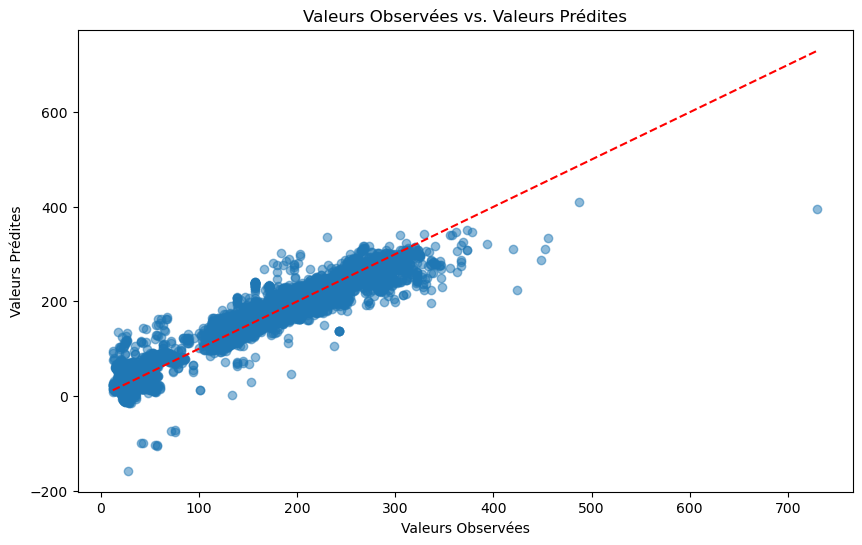

c:\Users\local\anaconda\envs\DST\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


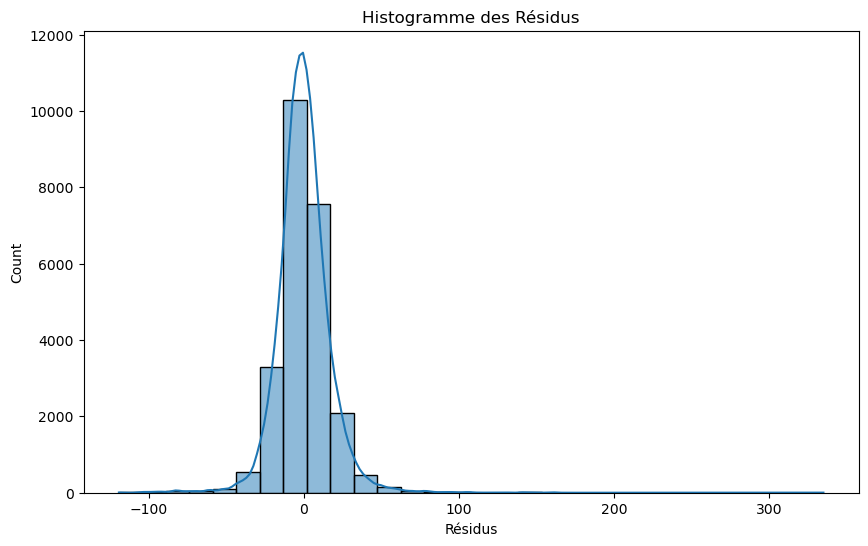

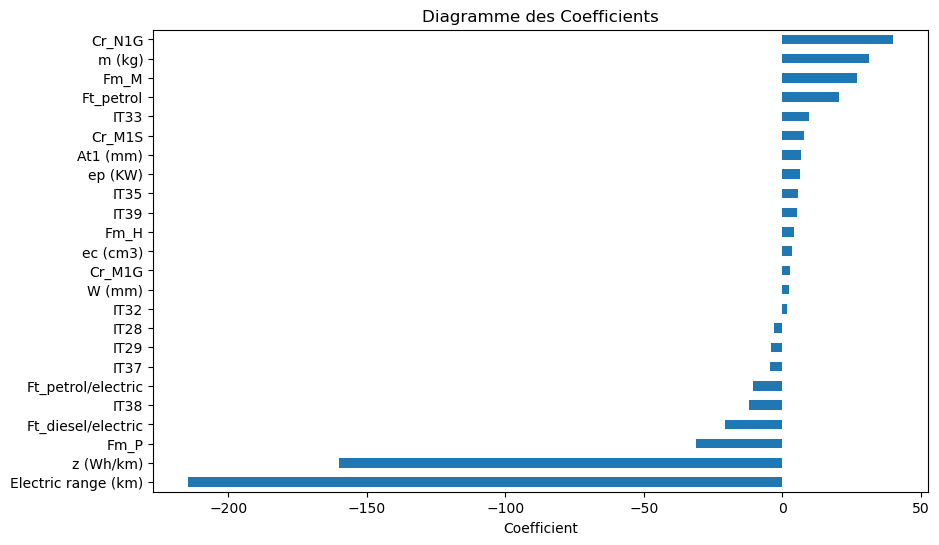

Au vu de ces coefficients, je crains un surajustement sur les valeurs électriques.


In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Diagramme de dispersion des valeurs observées vs. les valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Observées vs. Valeurs Prédites')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité
plt.show()

# Histogramme des résidus
residus = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, bins=30)
plt.xlabel('Résidus')
plt.title('Histogramme des Résidus')
plt.show()

# Diagramme des coefficients
coefficients = pd.DataFrame(model.coef_, X_train_scaled.columns, columns=['Coefficient']).sort_values(by='Coefficient')
plt.figure(figsize=(10, 6))
coefficients['Coefficient'].plot(kind='barh')
plt.xlabel('Coefficient')
plt.title('Diagramme des Coefficients')
plt.show()

print("Au vu de ces coefficients, je crains un surajustement sur les valeurs électriques.")


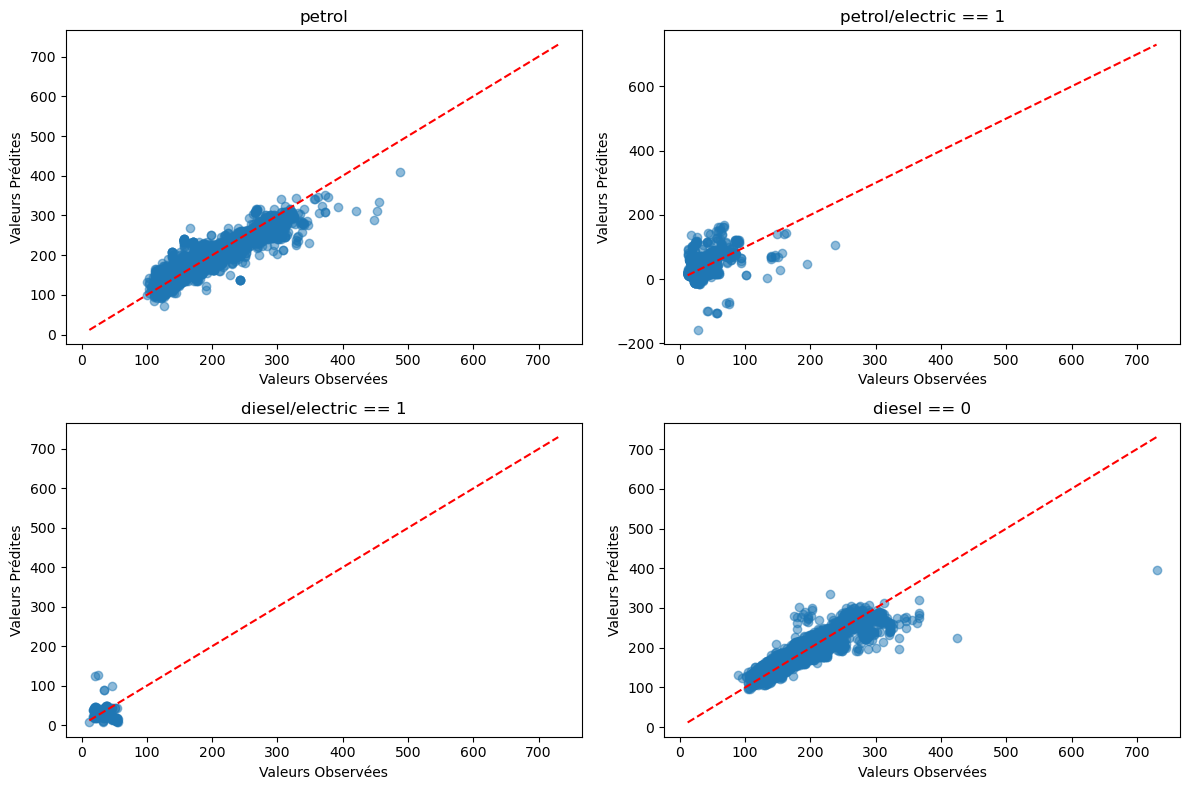

In [38]:
import matplotlib.pyplot as plt

# Filtrer les données en fonction des différentes conditions
Ft_petrol_1 = X_test_scaled[X_test_scaled['Ft_petrol'] == 1]
y_test_Ft_petrol_1 = y_test[X_test_scaled['Ft_petrol'] == 1]
y_pred_Ft_petrol_1 = model.predict(Ft_petrol_1)

Ft_petrol_electric_1 = X_test_scaled[X_test_scaled['Ft_petrol/electric'] == 1]
y_test_Ft_petrol_electric_1 = y_test[X_test_scaled['Ft_petrol/electric'] == 1]
y_pred_Ft_petrol_electric_1 = model.predict(Ft_petrol_electric_1)

Ft_diesel_electric_1 = X_test_scaled[X_test_scaled['Ft_diesel/electric'] == 1]
y_test_Ft_diesel_electric_1 = y_test[X_test_scaled['Ft_diesel/electric'] == 1]
y_pred_Ft_diesel_electric_1 = model.predict(Ft_diesel_electric_1)

Ft_none = X_test_scaled[(X_test_scaled['Ft_petrol'] + X_test_scaled['Ft_petrol/electric'] + X_test_scaled['Ft_diesel/electric']) == 0]
y_test_Ft_none = y_test[(X_test_scaled['Ft_petrol'] + X_test_scaled['Ft_petrol/electric'] + X_test_scaled['Ft_diesel/electric']) == 0]
y_pred_Ft_none = model.predict(Ft_none)

# Créer les diagrammes de dispersion
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(y_test_Ft_petrol_1, y_pred_Ft_petrol_1, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('petrol')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.subplot(2, 2, 2)
plt.scatter(y_test_Ft_petrol_electric_1, y_pred_Ft_petrol_electric_1, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('petrol/electric == 1')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.subplot(2, 2, 3)
plt.scatter(y_test_Ft_diesel_electric_1, y_pred_Ft_diesel_electric_1, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('diesel/electric == 1')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.subplot(2, 2, 4)
plt.scatter(y_test_Ft_none, y_pred_Ft_none, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('diesel == 0')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.tight_layout()
plt.show()


In [39]:
# validation croisée
from sklearn.model_selection import cross_val_score

model = LinearRegression()
scores = cross_val_score(model, X_train_scaled, y_train, cv=8, scoring='r2')
print("Cross-validated R^2 scores:", scores)
print("Average R^2:", scores.mean())

Cross-validated R^2 scores: [0.90578518 0.91284724 0.9113829  0.90693477 0.90933526 0.90243994
 0.90807949 0.91205382]
Average R^2: 0.9086073235681378


Les scores  de la validation croisée sont cohérents à travers les différentes itérations, le modèle est stable, ne dépend pas fortement de la partition spécifique des données, a une bonne capacité de généralisation.

C:\Users\abcd3\AppData\Local\Temp\ipykernel_13624\2386970137.py:10: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


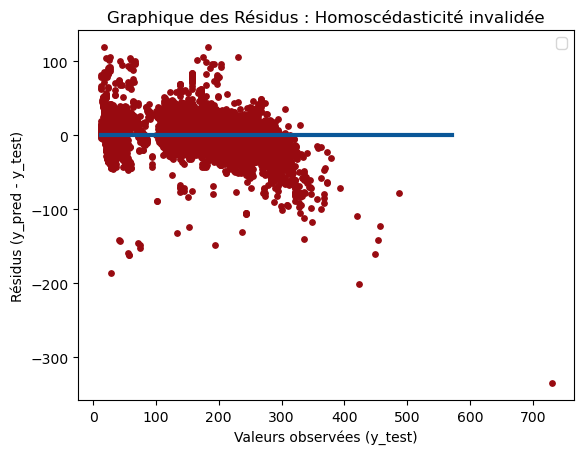

In [40]:
residus = y_pred - y_test

plt.scatter(y_test, residus, color='#980a10', s=15)
plt.plot((y_train.min(), y_train.max()), (0, 0), lw=3, color='#0a5798')
plt.title("Graphique des Résidus : Homoscédasticité invalidée")

# Ajouter des labels et une légende
plt.xlabel("Valeurs observées (y_test)")
plt.ylabel("Résidus (y_pred - y_test)")
plt.legend()
plt.show()

Les résidus montrent une déviation vers les valeurs négatives pour les valeurs 
les plus élevées. Cela signifie que le modèle a tendance à sous-estimer les 
valeurs les plus élevées.
On n'a donc pas d'homosscédasticité.

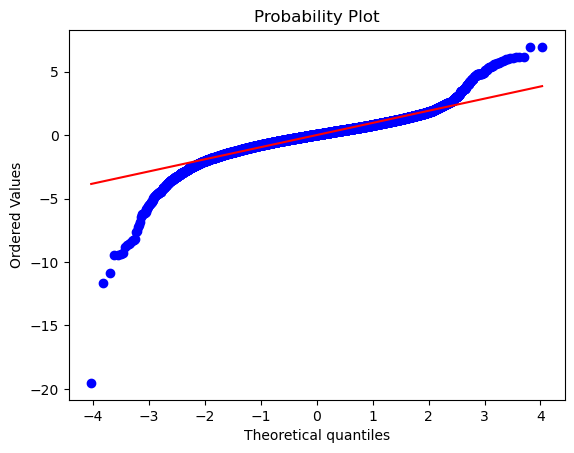

In [41]:
import scipy.stats as stats
residus_norm = (residus-residus.mean())/residus.std()

stats.probplot(residus_norm, plot=plt)
plt.show();

La distribution n'est pas normale, même si elle n'en est pas très éloignée.   
on va maintenant tenter de réduire le nombre de variables pour savoir si cela améliore le modèle.

In [42]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

sk = SelectKBest(f_regression, k=24)

sk.fit(X = X_train_scaled, y = y_train)

X_train_scaled.columns[sk.get_support()]


Index(['m (kg)', 'W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)',
       'Electric range (km)', 'IT28', 'IT29', 'IT32', 'IT33', 'IT35', 'IT37',
       'IT38', 'IT39', 'Ft_diesel/electric', 'Ft_petrol', 'Ft_petrol/electric',
       'Cr_M1G', 'Cr_M1S', 'Cr_N1G', 'Fm_H', 'Fm_M', 'Fm_P'],
      dtype='object')

In [43]:
sk_train = sk.transform(X_train_scaled)
sk_test = sk.transform(X_test_scaled)

sklr = LinearRegression()
sklr.fit(sk_train, y_train)

print("score sur jeu d'entraînement", sklr.score(sk_train, y_train))
print("score sur jeu de tet", sklr.score(sk_test, y_test))

# Prédictions
y_train_pred = sklr.predict(sk_train)
y_test_pred = sklr.predict(sk_test)

# Calcul et affichage du MSE
print("MSE sur jeu d'entraînement :", mean_squared_error(y_train, y_train_pred))
print("MSE sur jeu de test :", mean_squared_error(y_test, y_test_pred))

# Calcul et affichage du R²
print("R² sur jeu d'entraînement :", r2_score(y_train, y_train_pred))
print("R² sur jeu de test :", r2_score(y_test, y_test_pred))

score sur jeu d'entraînement 0.9088315726563168
score sur jeu de tet 0.9118129642370327
MSE sur jeu d'entraînement : 301.75813892785123
MSE sur jeu de test : 294.6944693127561
R² sur jeu d'entraînement : 0.9088315726563168
R² sur jeu de test : 0.9118129642370327


avec 20 variables explicatives, le modèle est quasiment aussi performant qu'avec toutes les 24 variables.  
En deça de 20 variables, le modèle perd en performance.

Fin d'exploration du modèle de regression simple  
  
***

# Modèle Ridge


In [44]:
# En cas d'exécution indépendante des travaux précédents: Charger les données depuis les fichiers CSV
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# charge les chemins vers les fichiers de données : base_processed, base_raw, base_models...
%run init_notebook.py

X_train_scaled = pd.read_csv(base_processed + 'X_train_scaled.csv')
X_test_scaled = pd.read_csv(base_processed + 'X_test_scaled.csv')
y_train = pd.read_csv(base_processed + 'y_train.csv')
y_test = pd.read_csv(base_processed + 'y_test.csv')
X_train_scaled = X_train_scaled.replace({False: 0, True: 1})
X_test_scaled = X_test_scaled.replace({False: 0, True: 1})
# s'assurer que la variable cible est correctement formatée
y_column = "Ewltp (g/km)"
y_train = y_train[y_column]
y_test = y_test[y_column]


C:\Users\abcd3\AppData\Local\Temp\ipykernel_13624\2334639107.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_scaled = X_train_scaled.replace({False: 0, True: 1})
C:\Users\abcd3\AppData\Local\Temp\ipykernel_13624\2334639107.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_scaled = X_test_scaled.replace({False: 0, True: 1})


In [45]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Modèle de regression Ridge
ridge = Ridge()

# Grille des hyperparamètres à tester
param_grid = {
    'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]
}

# Recherche par grille
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparameters:", grid_search.best_params_)
print("Meilleur R^2 score:", grid_search.best_score_)

# Utiliser le meilleur modèle pour prédire sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Performance du modèle sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE on test set: {mse}")
print(f"R^2 on test set: {r2}")

# Afficher les coefficients du modèle
coefficients = pd.DataFrame(best_model.coef_, X_train_scaled.columns, columns=['Coefficient'])
print(coefficients)


Meilleurs hyperparameters: {'alpha': 0.1}
Meilleur R^2 score: 0.9086820975651412
MSE on test set: 294.6791294371098
R^2 on test set: 0.9118175546800273
                     Coefficient
m (kg)                 31.136424
W (mm)                  2.275516
At1 (mm)                6.713260
ec (cm3)                3.393039
ep (KW)                 6.287127
z (Wh/km)            -159.861910
Electric range (km)  -213.667590
IT28                   -3.051517
IT29                   -4.184945
IT32                    1.654850
IT33                    9.716175
IT35                    5.426340
IT37                   -4.597014
IT38                  -11.125598
IT39                    4.791517
Ft_diesel/electric    -20.751067
Ft_petrol              20.429508
Ft_petrol/electric    -10.557071
Cr_M1G                  2.561037
Cr_M1S                  7.734697
Cr_N1G                 37.932286
Fm_H                    4.386283
Fm_M                   26.921860
Fm_P                  -31.308140


Le résultat est iperceptiblement meilleur que la regression simple.

essayons une grille plus fine autour de la meilleure valeur trouvée (0.1), ainsi que d'autres valeurs potentiellement intéressantes.

In [46]:
param_grid = {
    'alpha': [0.01, 0.05, 0.08, 0.09, 0.1, 0.11, 0.12, 0.25, 0.3, 0.38, 0.4, 0.42, 0.44, 0.5, 0.6, 1.0, 1.1, 5.0, 10.0, 100.0]
}

# Recherche par grille
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparameters:", grid_search.best_params_)
print("Meilleur R^2 score:", grid_search.best_score_)

# Utiliser le meilleur modèle pour prédire sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Performance du modèle sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE on test set: {mse}")
print(f"R^2 on test set: {r2}")

# Afficher les coefficients du modèle
coefficients = pd.DataFrame(best_model.coef_, X_train_scaled.columns, columns=['Coefficient'])
#print(coefficients)


Meilleurs hyperparameters: {'alpha': 0.4}
Meilleur R^2 score: 0.9086831355549487
MSE on test set: 294.6367077488092
R^2 on test set: 0.9118302493293434


In [47]:
# on affine encore autour du alpha trouvé

param_grid = {
    'alpha': [0.405, 0.4052]
}

# Recherche par grille
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5)
grid_search.fit(X_train_scaled, y_train)

# Affichage des meilleurs hyperparamètres
print("Meilleurs hyperparameters:", grid_search.best_params_)
print("Meilleur R^2 score:", grid_search.best_score_)

# Utiliser le meilleur modèle pour prédire sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Performance du modèle sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE on test set: {mse}")
print(f"R^2 on test set: {r2}")

# Afficher les coefficients du modèle
coefficients = pd.DataFrame(best_model.coef_, X_train_scaled.columns, columns=['Coefficient'])
#print(coefficients)
# meilleru alpha = 0.405:  0.9118304475721715


Meilleurs hyperparameters: {'alpha': 0.405}
Meilleur R^2 score: 0.9086831356413894
MSE on test set: 294.63604528108357
R^2 on test set: 0.9118304475721715


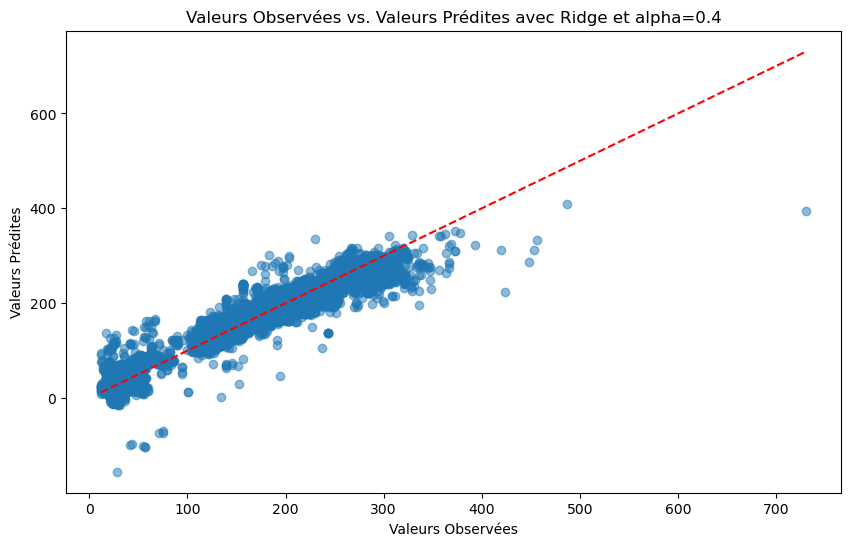

c:\Users\local\anaconda\envs\DST\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


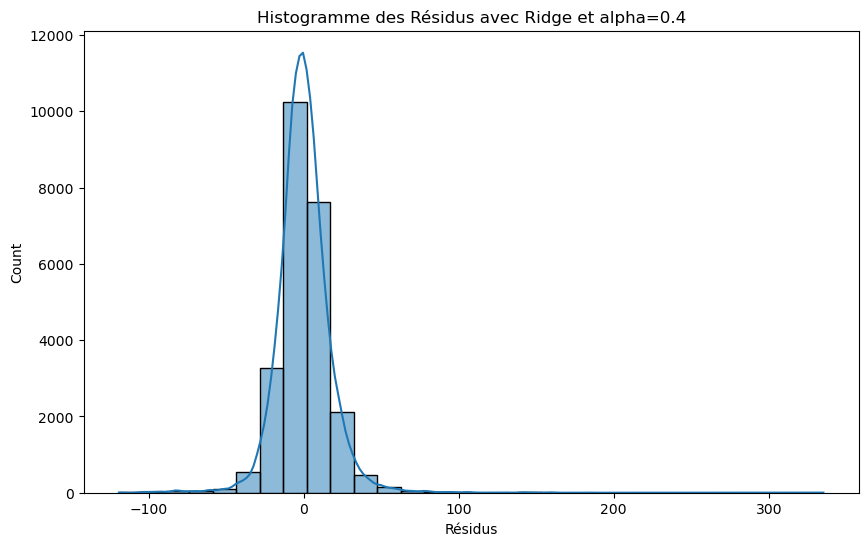

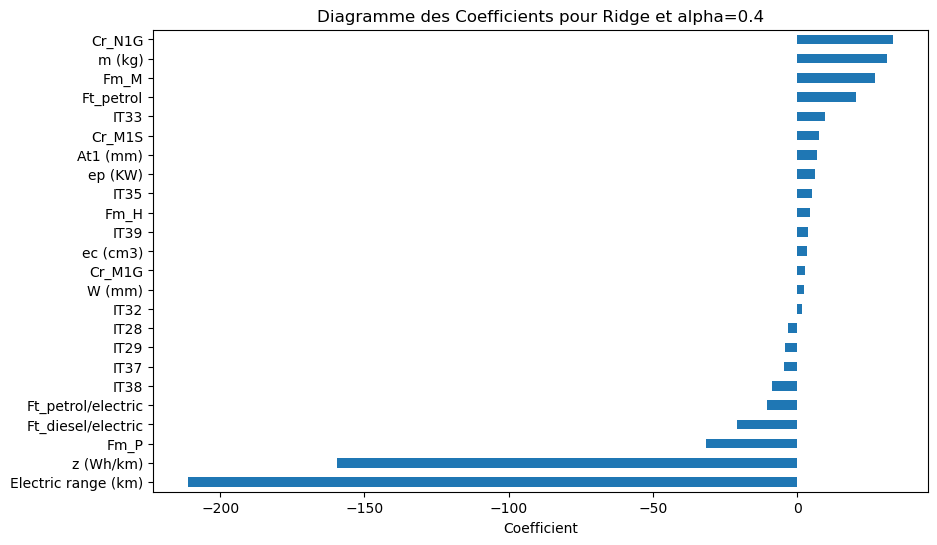

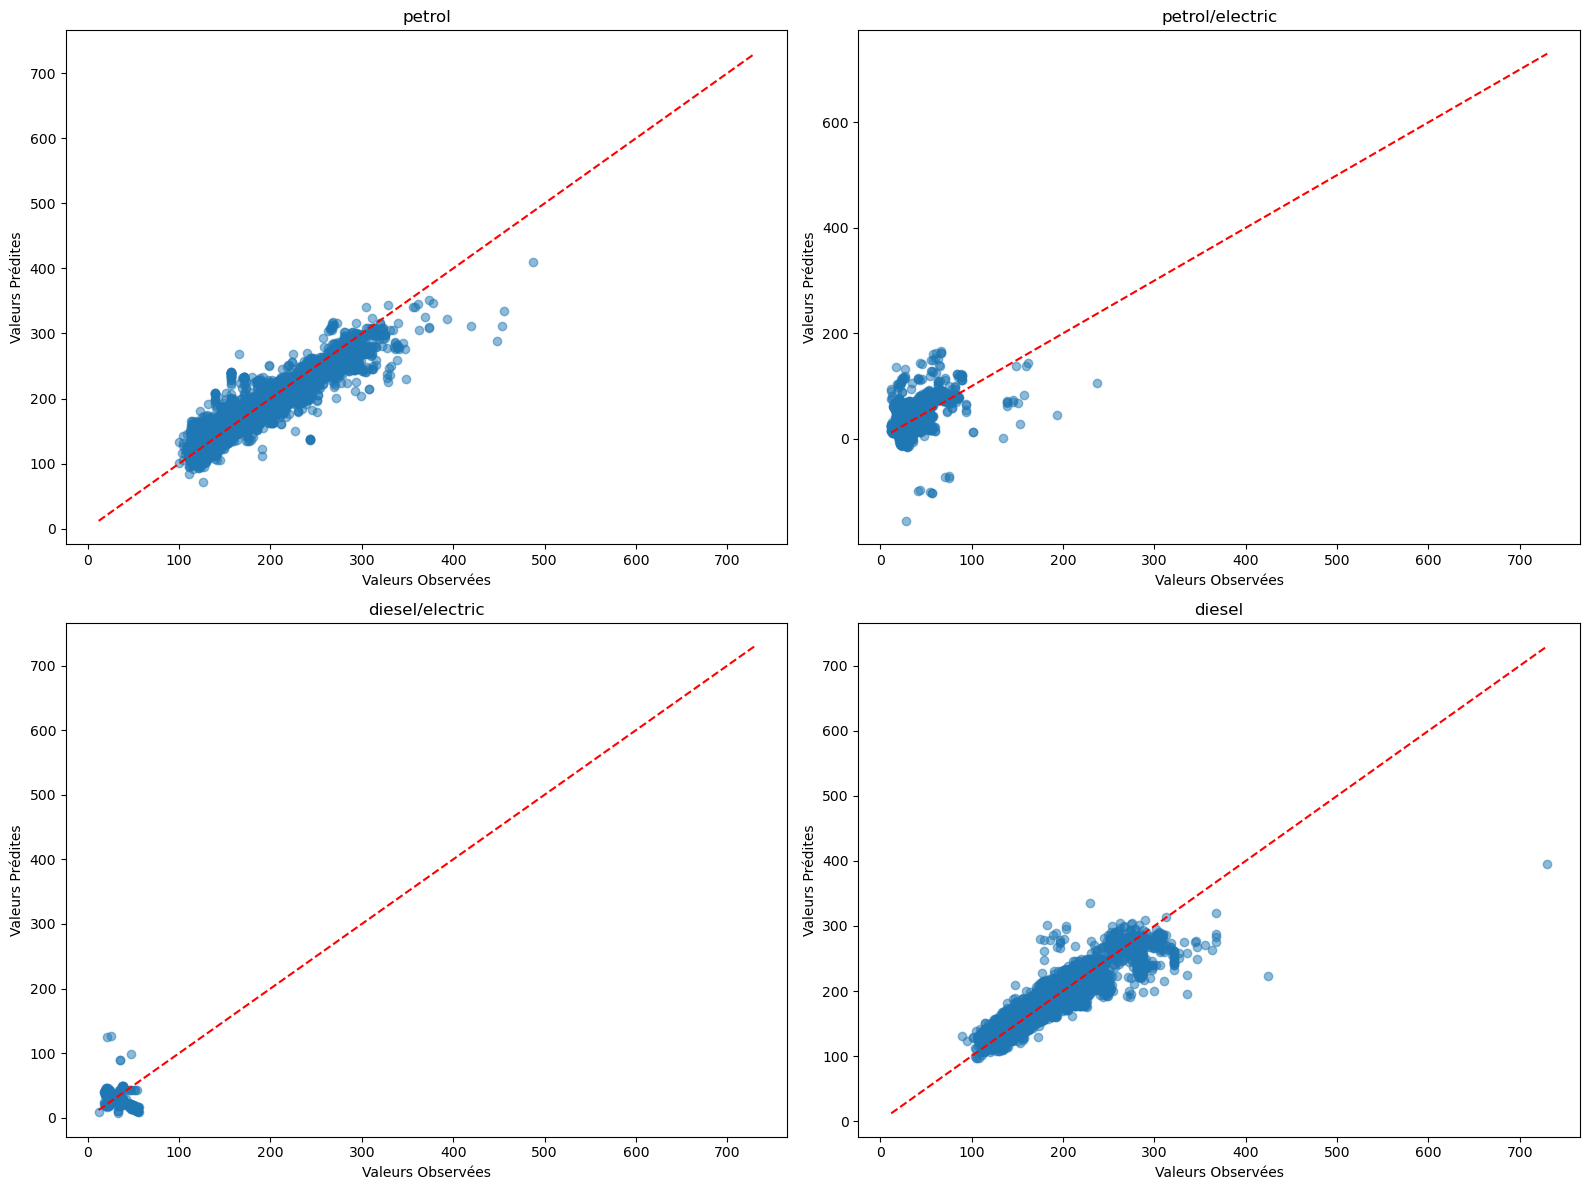

In [48]:
# Créer les graphiques comme pour la regression linéaire

our_title="Ridge et alpha=0.4"

# Diagramme de dispersion des valeurs observées vs. les valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('Valeurs Observées vs. Valeurs Prédites avec ' + our_title)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité
plt.show()

# Histogramme des résidus
residus = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residus, kde=True, bins=30)
plt.xlabel('Résidus')
plt.title('Histogramme des Résidus avec ' + our_title)
plt.show()

# Diagramme des coefficients
coefficients = pd.DataFrame(best_model.coef_, X_train_scaled.columns, columns=['Coefficient']).sort_values(by='Coefficient')
plt.figure(figsize=(10, 6))
coefficients['Coefficient'].plot(kind='barh')
plt.xlabel('Coefficient')
plt.title('Diagramme des Coefficients pour ' + our_title)
plt.show()

# Diagrammes "valeurs observées vs valeurs prédites" pour les différentes conditions

# Filtrer les données en fonction des différentes conditions
Ft_petrol_1 = X_test_scaled[X_test_scaled['Ft_petrol'] == 1]
y_test_Ft_petrol_1 = y_test[X_test_scaled['Ft_petrol'] == 1]
y_pred_Ft_petrol_1 = best_model.predict(Ft_petrol_1)

Ft_petrol_electric_1 = X_test_scaled[X_test_scaled['Ft_petrol/electric'] == 1]
y_test_Ft_petrol_electric_1 = y_test[X_test_scaled['Ft_petrol/electric'] == 1]
y_pred_Ft_petrol_electric_1 = best_model.predict(Ft_petrol_electric_1)

Ft_diesel_electric_1 = X_test_scaled[X_test_scaled['Ft_diesel/electric'] == 1]
y_test_Ft_diesel_electric_1 = y_test[X_test_scaled['Ft_diesel/electric'] == 1]
y_pred_Ft_diesel_electric_1 = best_model.predict(Ft_diesel_electric_1)

Ft_none = X_test_scaled[(X_test_scaled['Ft_petrol'] + X_test_scaled['Ft_petrol/electric'] + X_test_scaled['Ft_diesel/electric']) == 0]
y_test_Ft_none = y_test[(X_test_scaled['Ft_petrol'] + X_test_scaled['Ft_petrol/electric'] + X_test_scaled['Ft_diesel/electric']) == 0]
y_pred_Ft_none = best_model.predict(Ft_none)

# Créer les diagrammes de dispersion
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.scatter(y_test_Ft_petrol_1, y_pred_Ft_petrol_1, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('petrol')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.subplot(2, 2, 2)
plt.scatter(y_test_Ft_petrol_electric_1, y_pred_Ft_petrol_electric_1, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('petrol/electric')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.subplot(2, 2, 3)
plt.scatter(y_test_Ft_diesel_electric_1, y_pred_Ft_diesel_electric_1, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('diesel/electric')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.subplot(2, 2, 4)
plt.scatter(y_test_Ft_none, y_pred_Ft_none, alpha=0.5)
plt.xlabel('Valeurs Observées')
plt.ylabel('Valeurs Prédites')
plt.title('diesel')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ligne d'identité

plt.tight_layout()
plt.show()

Idées d'améliorations pour modèle Ridge:  
  
Paramètres d'Estimation  
Solver : Le paramètre solver dans Ridge Regression détermine la méthode utilisée pour ajuster le modèle. Essayer différentes valeurs pour voir si elles améliorent les performances.  
Par exemple : solver=['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'].  
  
Recherche d'Hypothèses Alternatives  
Polynomial Features : Utiliser PolynomialFeatures pour créer des interactions entre les caractéristiques et voir si un modèle polynomial Ridge améliore les performances.

In [49]:
"""
# Ici nous faisons une estimation de temps pour la suite de l'optimisation des hyperparamètres

import time
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures

# Ajouter des caractéristiques polynomiales
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Sélection des meilleures caractéristiques
selector = SelectKBest(score_func=f_regression, k='all')
X_train_best = selector.fit_transform(X_train_poly, y_train)
X_test_best = selector.transform(X_test_poly)


# Définir le modèle de Ridge Regression
ridge = Ridge()

# Définir la grille des hyperparamètres à tester
param_grid = {
    'alpha': [0.4],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],
    'max_iter': [50]
}

# Mettre en place la recherche par grille
grid_search = GridSearchCV(estimator=ridge, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)

# Temps d'exécution d'une seule itération
start_time = time.time()

# Effectuer une seule itération de la recherche par grille
grid_search.fit(X_train_best, y_train)

end_time = time.time()
single_iteration_time = end_time - start_time
print(f"Time taken for a single iteration: {single_iteration_time} seconds")

# Calculer le nombre total de combinaisons hyperparamètres
total_combinations = len(param_grid['alpha']) * len(param_grid['solver']) * len(param_grid['max_iter'])
total_iterations = total_combinations * 5  # 5 folds in cross-validation

# Estimer le temps total
estimated_total_time = single_iteration_time * total_iterations
print(f"Estimated total time for grid search: {estimated_total_time / 60} minutes")
"""

Time taken for a single iteration: 24.255954027175903 seconds
Estimated total time for grid search: 12.127977013587952 minutes


Essai du 06/03/2025:
   sans n_jobs
   Time taken for a single iteration: 81.56777310371399 seconds
   Estimated total time for grid search: 40.783886551856995 minutes
   
   njobs=-1:
   Time taken for a single iteration: 20.959975481033325 seconds
   Estimated total time for grid search: 10.479987740516663 minutes


In [12]:
import time
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Ajouter des caractéristiques polynomiales
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# Sélection des meilleures caractéristiques
selector = SelectKBest(score_func=f_regression, k='all')
X_train_best = selector.fit_transform(X_train_poly, y_train)
X_test_best = selector.transform(X_test_poly)

# Définir le pipeline de standardisation et de modélisation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

# Définir la grille des hyperparamètres à tester
param_grid = {
    'ridge__alpha': [0.7, 0.75, 0.8],
    'ridge__solver': ['saga'],
#    'ridge__max_iter': [1000, 2000, 3000, 5000]
    'ridge__max_iter': [3000]  # je voulais 1500 j'abandonne après 52min
}

# Mettre en place la recherche par grille
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
# essayer cv=3 et voir njobs=-1

start_time= time.time()
# Effectuer la recherche par grille
grid_search.fit(X_train_best, y_train)

# Afficher les meilleurs hyperparamètres et le score correspondant
print("Meilleurs hyperparamètres (jeu d'entraînement):", grid_search.best_params_)
print("Meilleur R^2 score  (jeu d'entraînement):", grid_search.best_score_)

# Utiliser le meilleur modèle pour prédire sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_best)

# Évaluer la performance du modèle sur l'ensemble de test
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error sur jeu de test: {mse}")
print(f"R^2 sur jeu de test: {r2}")

# Access the Ridge model within the pipeline to retrieve the coefficients
ridge_model = best_model.named_steps['ridge']

# Get the coefficients
coefficients = pd.DataFrame(ridge_model.coef_, poly.get_feature_names_out(X_train_scaled.columns), columns=['Coefficient'])
print(coefficients)

end_time = time.time()
single_iteration_time = end_time - start_time
print(f"Time taken : {single_iteration_time} seconds")


Meilleurs hyperparamètres (jeu d'entraînement): {'ridge__alpha': 0.7, 'ridge__max_iter': 3000, 'ridge__solver': 'saga'}
Meilleur R^2 score  (jeu d'entraînement): 0.9493528180361077
Mean Squared Error sur jeu de test: 163.31494480794666
R^2 sur jeu de test: 0.9511281602535931
           Coefficient
m (kg)       12.694278
W (mm)        1.272333
At1 (mm)      4.178383
ec (cm3)      1.835901
ep (KW)       2.462083
...                ...
Fm_H Fm_M     0.000000
Fm_H Fm_P     0.000000
Fm_M^2        2.932225
Fm_M Fm_P     0.000000
Fm_P^2       -4.234947

[324 rows x 1 columns]
Time taken : 1226.0600080490112 seconds


Pour  
param_grid = {  
    'ridge__alpha': [0.01, 0.35, 0.4, 0.45, 1.0],  
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],  
    'ridge__max_iter': [10, 50]  
}  
  
Meilleurs hyperparamètres: {'ridge__alpha': 1.0, 'ridge__max_iter': 50, 'ridge__solver': 'sparse_cg'}  
Meilleur R^2 score: 0.949287384746364  
MSE on test set: 162.4939231227601  
R^2 on test set: 0.9513738502011602  
           Coefficient  
m (kg)       15.081176
W (mm)       -0.245503
At1 (mm)      3.468106
ec (cm3)      1.653317
ep (KW)       1.950622
...                ...
Fm_H Fm_M     0.000000
Fm_H Fm_P     0.000000
Fm_M^2        2.938673
Fm_M Fm_P     0.000000
Fm_P^2       -4.241753

***  

Pour   
param_grid = {  
    'ridge__alpha': [0.5, 1, 2.0, 4.0],  
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],  
    'ridge__max_iter': [150, 1500]  
}  
Meilleurs hyperparamètres (jeu d'entraînement): {'ridge__alpha': 1, 'ridge__max_iter': 1500, 'ridge__solver': 'saga'}  
Meilleur R^2 score  (jeu d'entraînement): 0.9492732527654555  
Mean Squared Error sur jeu de test: 163.75000944398613  
R^2 sur jeu de test: 0.9509979675807986  
exécution windows: 143 min 56 s  
execution linux : < 105 min

***

    'ridge__alpha': [0.9, 1, 1.1],
    'ridge__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'saga'],
    'ridge__max_iter': [2000]
pas de warning sur max_iter
Meilleurs hyperparamètres (jeu d'entraînement): {'ridge__alpha': 0.9, 'ridge__max_iter': 2000, 'ridge__solver': 'saga'}
Meilleur R^2 score  (jeu d'entraînement): 0.9493525315362694
Mean Squared Error sur jeu de test: 163.31534166714258
R^2 sur jeu de test: 0.9511280414938615
           Coefficient
m (kg)       12.693583
W (mm)        1.272751
At1 (mm)      4.178403
ec (cm3)      1.836487
ep (KW)       2.461812
...                ...
Fm_H Fm_M     0.000000
Fm_H Fm_P     0.000000
Fm_M^2        2.932144
Fm_M Fm_P     0.000000
Fm_P^2       -4.234718

[324 rows x 1 columns]
Time taken : 5896.527683019638 seconds (98 min)

***

param_grid = {
    'ridge__alpha': [0.8, 0.85, 0.9, 0.95],
    'ridge__solver': ['saga'],
    'ridge__max_iter': [1500]
}
1 warning sur max_iter
20 min

Meilleurs hyperparamètres (jeu d'entraînement): {'ridge__alpha': 0.8, 'ridge__max_iter': 1500, 'ridge__solver': 'saga'}
Meilleur R^2 score  (jeu d'entraînement): 0.949273221232346
Mean Squared Error sur jeu de test: 163.74965083382628
R^2 sur jeu de test: 0.9509980748945431
           Coefficient
m (kg)       12.065512
W (mm)        1.654133
At1 (mm)      4.357518
ec (cm3)      1.899612
ep (KW)       2.616687
...                ...
Fm_H Fm_M     0.000000
Fm_H Fm_P     0.000000
Fm_M^2        2.948384
Fm_M Fm_P     0.000000
Fm_P^2       -4.239006

[324 rows x 1 columns]
Time taken : 1224.0648322105408 seconds


Meilleurs hyperparamètres (jeu d'entraînement): {'ridge__alpha': 0.7, 'ridge__max_iter': 3000, 'ridge__solver': 'saga'}
Meilleur R^2 score  (jeu d'entraînement): 0.9493528180361077
Mean Squared Error sur jeu de test: 163.31494480794666
R^2 sur jeu de test: 0.9511281602535931
           Coefficient
m (kg)       12.694278
W (mm)        1.272333
At1 (mm)      4.178383
ec (cm3)      1.835901
ep (KW)       2.462083
...                ...
Fm_H Fm_M     0.000000
Fm_H Fm_P     0.000000
Fm_M^2        2.932225
Fm_M Fm_P     0.000000
Fm_P^2       -4.234947

[324 rows x 1 columns]
Time taken : 1226.0600080490112 seconds (20' 26" mais le n_jobs=-1 ne permet d'utiliser 100% CPU que les premières minutes)
Ceci est le meilleur résultat Ridge pour l'instant. J'arrête les recherches ici. 06/03/2025.



Fin de Ridge

***  

# K-NN

In [13]:
# En cas d'exécution indépendante des travaux précédents: Charger les données depuis les fichiers CSV
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# charge les chemins vers les fichiers de données : base_processed, base_raw, base_models...
%run init_notebook.py

X_train_scaled = pd.read_csv(base_processed + 'X_train_scaled.csv')
X_test_scaled = pd.read_csv(base_processed + 'X_test_scaled.csv')
y_train = pd.read_csv(base_processed + 'y_train.csv')
y_test = pd.read_csv(base_processed + 'y_test.csv')
X_train_scaled = X_train_scaled.replace({False: 0, True: 1})
X_test_scaled = X_test_scaled.replace({False: 0, True: 1})
# s'assurer que la variable cible est correctement formatée
y_column = "Ewltp (g/km)"
y_train = y_train[y_column]
y_test = y_test[y_column]


C:\Users\abcd3\AppData\Local\Temp\ipykernel_13624\2334639107.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_scaled = X_train_scaled.replace({False: 0, True: 1})
C:\Users\abcd3\AppData\Local\Temp\ipykernel_13624\2334639107.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_scaled = X_test_scaled.replace({False: 0, True: 1})


In [17]:
# Afficher les colonnes de X_train_best
print(X_train_scaled.columns)
print("..   ")
print(y_train.head(3))


Index(['m (kg)', 'W (mm)', 'At1 (mm)', 'ec (cm3)', 'ep (KW)', 'z (Wh/km)',
       'Electric range (km)', 'IT28', 'IT29', 'IT32', 'IT33', 'IT35', 'IT37',
       'IT38', 'IT39', 'Ft_diesel/electric', 'Ft_petrol', 'Ft_petrol/electric',
       'Cr_M1G', 'Cr_M1S', 'Cr_N1G', 'Fm_H', 'Fm_M', 'Fm_P'],
      dtype='object')
..   
0     30.0
1     36.0
2    159.0
Name: Ewltp (g/km), dtype: float64


In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialisation du modèle k-NN
knn = KNeighborsRegressor()

# Définir une grille de recherche pour optimiser le modèle (par ex. le nombre de voisins k)
param_grid = {
    'n_neighbors': [3, 5, 7, 10],  # Différentes valeurs de k
    'weights': ['uniform', 'distance'],  # Pondération des voisins
    'p': [1, 2]  # Distance de Minkowski (p=1 pour Manhattan, p=2 pour Euclidienne)
}

# Configuration de la recherche de grille avec validation croisée
grid_search = GridSearchCV(
    estimator=knn,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',  # Mesurer l'erreur quadratique moyenne
    n_jobs=-1  # -1 pour Utiliser tous les cœurs disponibles pour paralléliser les calculs
)

# Ajuster le modèle sur les données
grid_search.fit(X_train_scaled, y_train)

# Meilleurs paramètres trouvés
best_knn = grid_search.best_estimator_
print("Meilleurs paramètres :", grid_search.best_params_)

# Prédire sur les données d'entraînement pour calculer l'erreur
y_pred = best_knn.predict(X_train_scaled)
mse = mean_squared_error(y_train, y_pred)
print(f"Erreur quadratique moyenne (MSE) : {mse}")
print(f"R2 score : {best_knn.score(X_train_scaled, y_train)}")


# Exemple d'utilisation pour prédire de nouvelles données
# y_test_pred = best_knn.predict(X_test_scaled) # Si X_test_scaled est disponible


Meilleurs paramètres : {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Erreur quadratique moyenne (MSE) : 13.544786949855423
R2 score : 0.9959077924813858


In [ ]:
excuté en 2'36" le 06/03/2025 avec n_jobs=-1

Meilleurs paramètres : {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
Erreur quadratique moyenne (MSE) : 13.544786949855423
R2 score : 0.9959077924813858

fin du k-NN

***

# Random Forest

In [21]:
# En cas d'exécution indépendante des travaux précédents: Charger les données depuis les fichiers CSV
from sklearn.metrics import mean_squared_error, r2_score

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# charge les chemins vers les fichiers de données : base_processed, base_raw, base_models...
%run init_notebook.py

X_train_scaled = pd.read_csv(base_processed + 'X_train_scaled.csv')
X_test_scaled = pd.read_csv(base_processed + 'X_test_scaled.csv')
y_train = pd.read_csv(base_processed + 'y_train.csv')
y_test = pd.read_csv(base_processed + 'y_test.csv')
X_train_scaled = X_train_scaled.replace({False: 0, True: 1})
X_test_scaled = X_test_scaled.replace({False: 0, True: 1})
# s'assurer que la variable cible est correctement formatée
y_column = "Ewltp (g/km)"
y_train = y_train[y_column]
y_test = y_test[y_column]


C:\Users\abcd3\AppData\Local\Temp\ipykernel_13624\2334639107.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_train_scaled = X_train_scaled.replace({False: 0, True: 1})
C:\Users\abcd3\AppData\Local\Temp\ipykernel_13624\2334639107.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X_test_scaled = X_test_scaled.replace({False: 0, True: 1})


In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialisation du modèle Random Forest
rf = RandomForestRegressor(random_state=42)

# Définir une grille de recherche pour optimiser le modèle
param_grid = {
    'n_estimators': [300, 600],  # Nombre d'arbres dans la forêt
    'max_depth': [None],      # Profondeur maximale des arbres
    'min_samples_split': [10, 16], # Nombre minimum d'échantillons pour diviser un nœud
    'min_samples_leaf': [1, 2]    # Nombre minimum d'échantillons dans une feuille
}

# Configuration de la recherche de grille avec validation croisée
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='neg_mean_squared_error',
    n_jobs=-1  # Utiliser tous les cœurs disponibles
)

# Ajuster le modèle sur les données
grid_search_rf.fit(X_train_scaled, y_train)

# Meilleurs paramètres trouvés
best_rf = grid_search_rf.best_estimator_
print("Meilleurs paramètres :", grid_search_rf.best_params_)

# Prédictions sur les données d'entraînement
y_pred_rf = best_rf.predict(X_train_scaled)

# Calcul de MSE et R²
mse_rf = mean_squared_error(y_train, y_pred_rf)
r2_rf = r2_score(y_train, y_pred_rf)
print(f"Erreur quadratique moyenne (MSE) : {mse_rf}")
print(f"Score R2 : {r2_rf}")


Meilleurs paramètres : {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}
Erreur quadratique moyenne (MSE) : 23.601756123865915
Score R2 : 0.9928693390143274
